<a href="https://colab.research.google.com/github/lmcanavals/topics/blob/main/w03_01_intro_nqueens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
for x1 in [1, 2]:
    for x2 in [1, 2]:
        if x1 != x2:
            for x3 in [1, 2, 3]:
                if x1 != x3 and x2 != x3:
                    if 3*x1 + x2 + x3 == 10:
                        print(x1, x2, x3)

2 1 3


In [ ]:
!pip install python-constraint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24082 sha256=edd611bb693d9770ca84435d9d43088ccd2a6d064844389db053c6a0fbd3fa50
  Stored in directory: /root/.cache/pip/wheels/51/36/1f/c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [ ]:
from constraint import *

In [ ]:
problem = Problem()

problem.addVariables(['x1', 'x2'], [1, 2])
problem.addVariables(['x3'], [1, 2, 3])

def constraint(x1, x2, x3):
    if x1 != x2 and x1 != x3  and x2 != x3:
        if 3 * x1 + x2 + x3 == 10:
            return True

problem.addConstraint(constraint, ['x1', 'x2', 'x3'])

solutions = problem.getSolutions()

for solution in solutions:
    print(solution)

{'x1': 2, 'x2': 1, 'x3': 3}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw(board, piece=u"\u265b"):
  n = len(board)
  board = [board[i] for i in range(n)]
  b = np.zeros((n, n, 3), dtype=int)
  b += [255, 128, 80]

  b[::2, ::2] = [255, 225, 120]
  b[1::2, 1::2] = [255, 225, 120]

  _, ax = plt.subplots()
  ax.imshow(b)
  for row, col in enumerate(board):
    ax.text(col, row, piece, fontsize=200/n, va="center", ha="center")
  ax.set(xticks=[], yticks=[])
  plt.show()


In [ ]:
problem = Problem()
numpieces = 4
cols = range(numpieces)
rows = range(numpieces)
problem.addVariables(cols, rows)
for col1 in cols:
    for col2 in cols:
        if col1 < col2:
            problem.addConstraint(lambda row1, row2: row1 != row2,
                                  (col1, col2))
solutions = problem.getSolutions()
solutions

[{0: 3, 1: 2, 2: 1, 3: 0},
 {0: 3, 1: 2, 2: 0, 3: 1},
 {0: 3, 1: 1, 2: 2, 3: 0},
 {0: 3, 1: 1, 2: 0, 3: 2},
 {0: 3, 1: 0, 2: 1, 3: 2},
 {0: 3, 1: 0, 2: 2, 3: 1},
 {0: 2, 1: 3, 2: 0, 3: 1},
 {0: 2, 1: 3, 2: 1, 3: 0},
 {0: 2, 1: 1, 2: 3, 3: 0},
 {0: 2, 1: 1, 2: 0, 3: 3},
 {0: 2, 1: 0, 2: 1, 3: 3},
 {0: 2, 1: 0, 2: 3, 3: 1},
 {0: 1, 1: 2, 2: 0, 3: 3},
 {0: 1, 1: 2, 2: 3, 3: 0},
 {0: 1, 1: 3, 2: 2, 3: 0},
 {0: 1, 1: 3, 2: 0, 3: 2},
 {0: 1, 1: 0, 2: 3, 3: 2},
 {0: 1, 1: 0, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 3, 3: 2},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 2, 2: 1, 3: 3},
 {0: 0, 1: 2, 2: 3, 3: 1},
 {0: 0, 1: 3, 2: 2, 3: 1},
 {0: 0, 1: 3, 2: 1, 3: 2}]

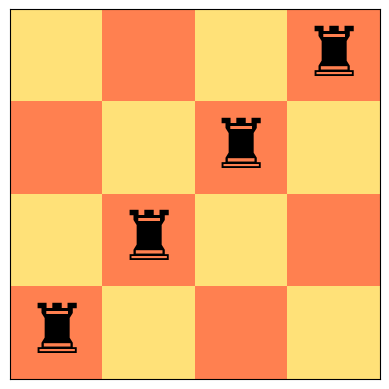

In [ ]:
draw(solutions[0], u"\u265c")

In [ ]:
def test():
    def tost():
        print(x, y)

    d = []
    for x in range(2):
        for y in range(3):
            d.append(tost)

    for f in d:
        f()

In [ ]:
test()

1 2
1 2
1 2
1 2
1 2
1 2


In [ ]:
def f():
    a, b = 0, 1
    t = [a, b]
    def x():
        t[0], t[1] = t[1], sum(t)
        return t[0]
    return x

y = f()
for _ in range(5):
    print(y())
z = f()
for _ in range(5):
    print(y())
for _ in range(5):
    print(z())
for _ in range(5):
    print(y())

1
1
2
3
5
8
13
21
34
55
1
1
2
3
5
89
144
233
377
610


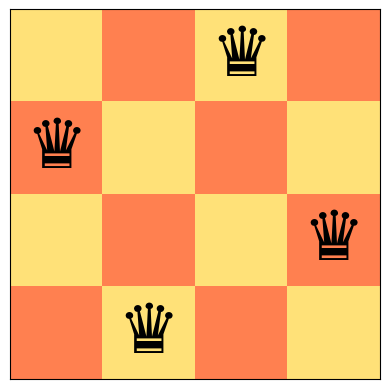

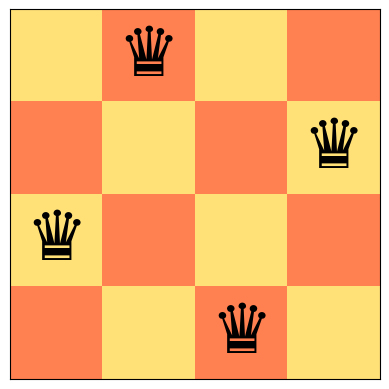

In [ ]:
problem = Problem()
n = 4
cols = range(n)
rows = range(n)
problem.addVariables(cols, rows)
problem.addConstraint(AllDifferentConstraint())
for i in range(n - 1):
    for j in range(n):
        if i != j:
            def weird():
                I, J = i, j
                def f(x, y):
                    return abs(x - y) != abs(I - J)
                return f
            problem.addConstraint(weird(), (i, j))

solutions = problem.getSolutions()
for solution in solutions:
    draw(solution)

In [ ]:
problem = Problem()
board = [(i, j) for j in range(2) for i in range(2)]
problem.addVariables(board, range(1, 10))
